In [185]:
# Primero se importan todas las librerias necesarias para la guia. 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import sklearn as skl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

primeras lineas:    id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             norma

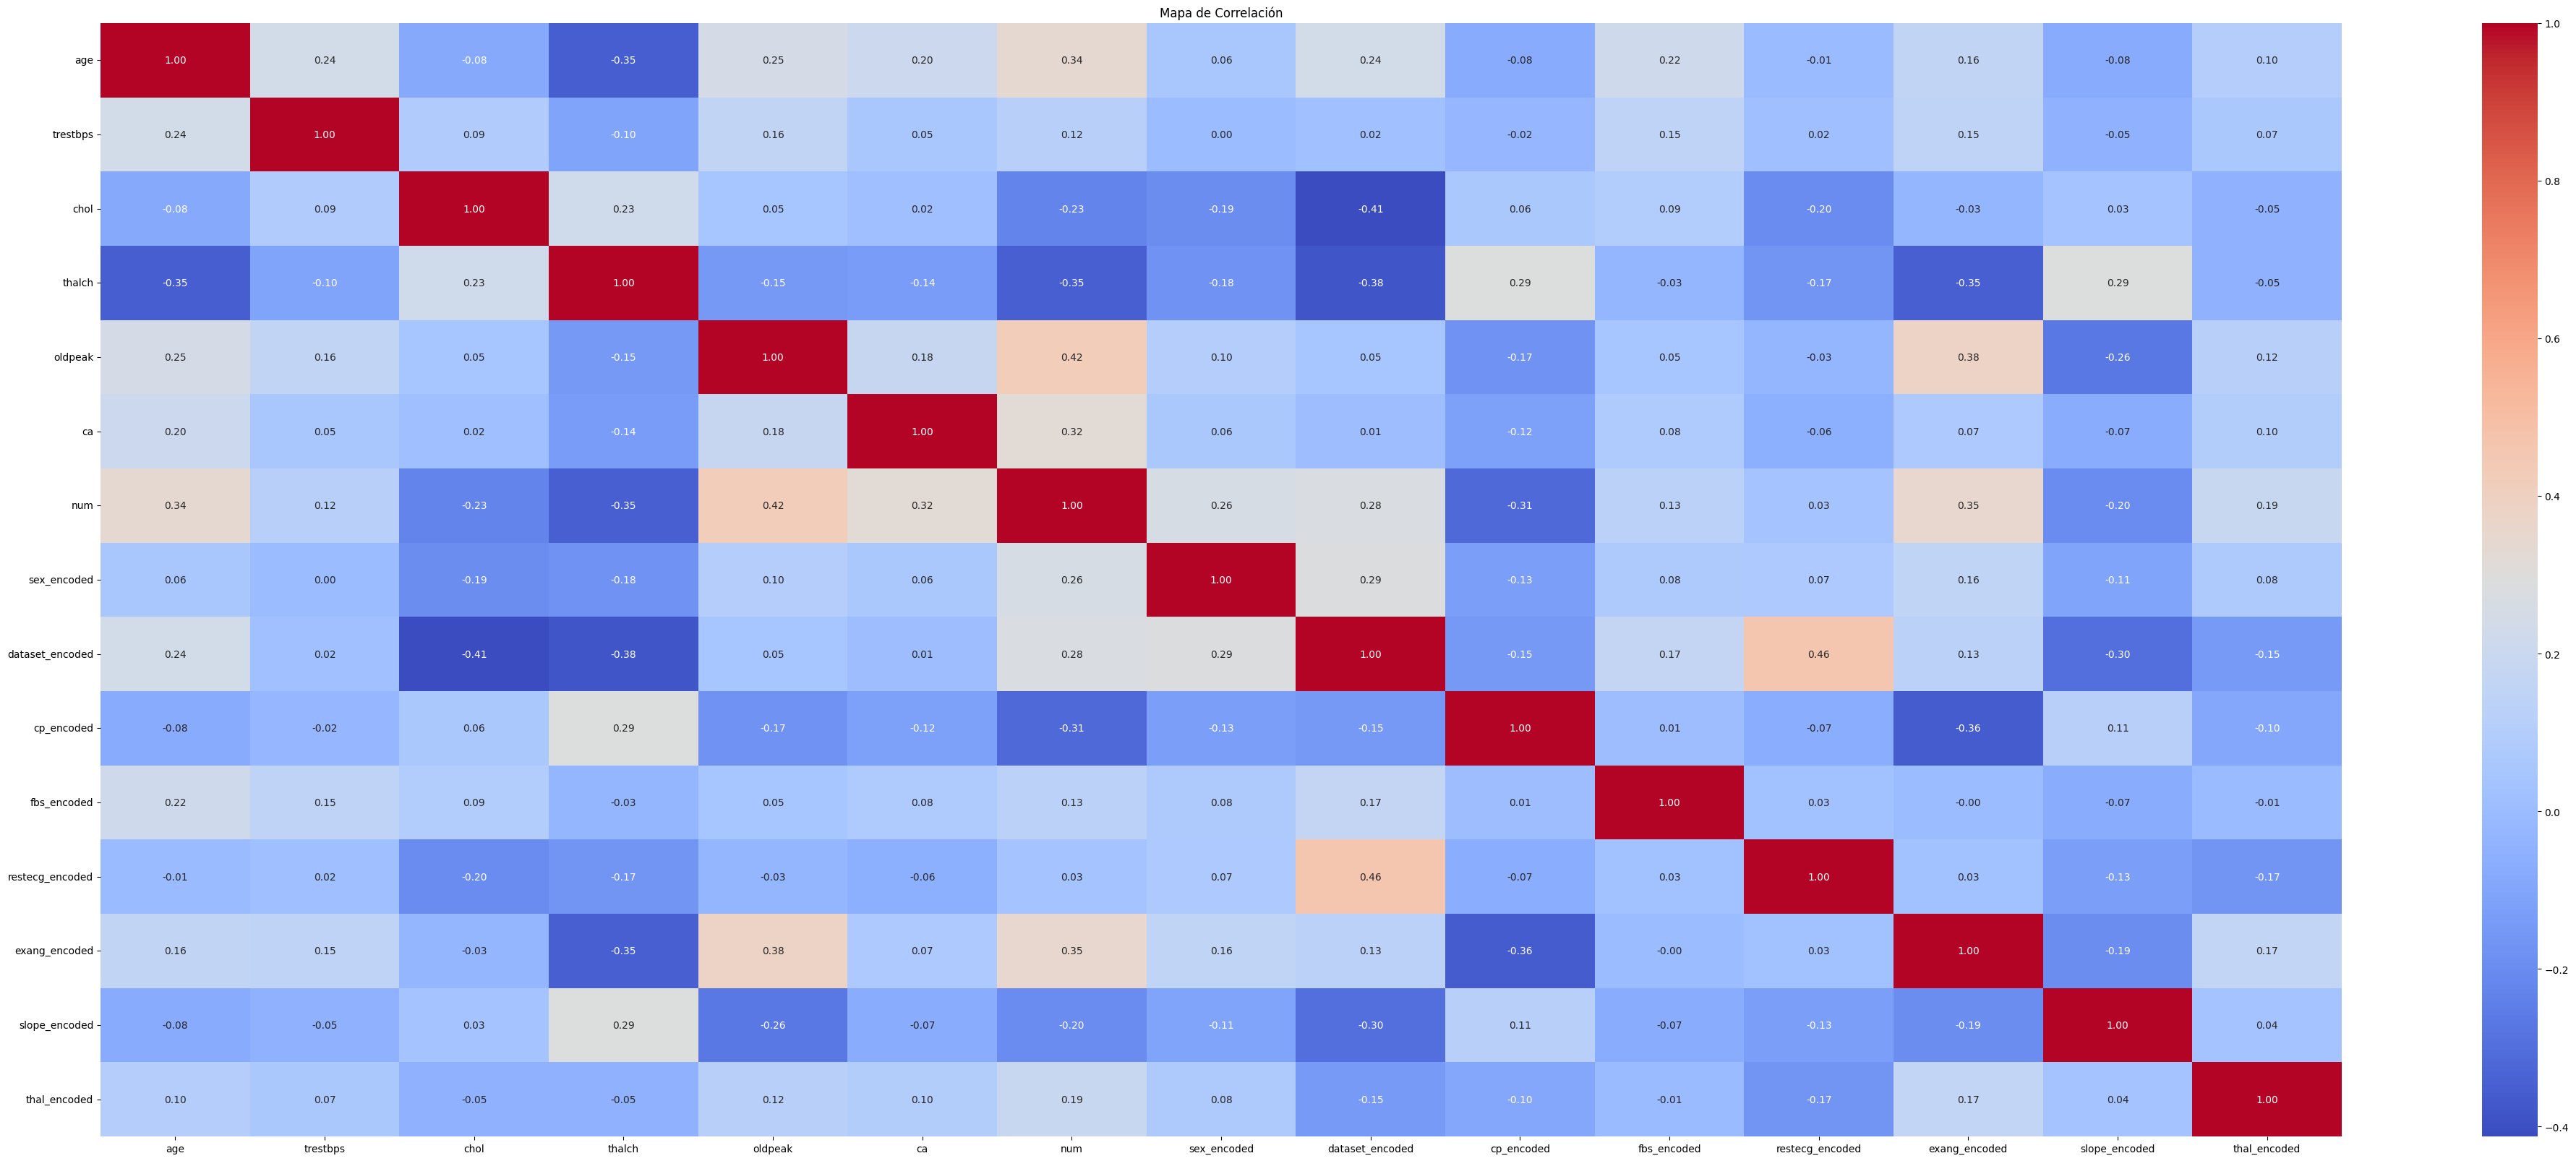

In [203]:
#1️⃣ Carga y EDA básico:

#1️⃣Cargar los datos y visualizar las primeras 5 filas.

# Se carga la información de la base de datos utilizando pandas.
df = pd.read_csv("C:\\Users\\Lenovo\\Documents\\Machine learning 1\\heart_disease_uci.csv")
# Se cargan las primeras 5 filas. 
print(f"primeras lineas: {df.head()}")
#1️⃣Realizar descripción estadística (describe()), verificar tipos de datos y evaluar presencia de valores nulos.

# Se sacan las descripciones estadísticas con describe.
print(f"descripción estadística:{df.dtypes}")
# Se verifican que no hayan códigos nulos.
print(df.isnull().sum())


Numerical_columns = ["age","trestbps","chol","thalch","oldpeak","ca"]
Categorical_Columns = ["sex","dataset","cp","fbs","restecg","exang","slope","thal"]


print([Numerical_columns])
print([Categorical_Columns])




imputer = SimpleImputer(strategy="mean")
df[Numerical_columns] = pd.DataFrame(imputer.fit_transform(df[Numerical_columns]), columns=Numerical_columns)


imputer = SimpleImputer(strategy="most_frequent")
df[Categorical_Columns] = pd.DataFrame(imputer.fit_transform(df[Categorical_Columns]), columns=Categorical_Columns)

print(f"new data imputed:{df.isnull().sum()}")


#1️⃣Visualizar un mapa de calor de correlaciones para identificar posibles variables clave.

# Se seleccionan todas las columnas de la base de datos y se crea una sola variable para el mapa de calor. 



variables = ["age","sex","dataset","cp","trestbps","chol","fbs","restecg","thalch","exang","oldpeak","slope","ca","thal","num"]


# Las variables categóricas se transforman en variables númericas

encoder = LabelEncoder()

# Se crea una función para cambiar las columnas de tipo object con datos númericos.

for column in variables:
    if column in df.columns and df[column].dtype== 'object':  # Verificar si la columna es categórica
        df[column + '_encoded'] = encoder.fit_transform(df[column])

# Se crean las nuevas columnas con el sufijo _encoded con las nuevas variables numéricas.
datos = df[[col for col in variables if col in df.columns and df[col].dtype != 'object'] +
           [col + '_encoded' for col in variables if col in df.columns and df[col].dtype == 'object']]
  
# Se crea un data frame con solo las variables. 


print(datos)

# Se dan los parametros para la graficación del mapa de calor usando Seaborn. 
matrix_correlacion = datos.corr()
plt.figure(figsize=(50,20))
sns.heatmap(matrix_correlacion,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Mapa de Correlación")
plt.show()



Aquí se presenta la primera parte del ejercicio: se importa la base de datos, se describre, y se muestra las variables de la base de datos y se crea el mapa de calor para determinar altas correlaciones entre variables.

In [220]:
#2️⃣ Selección de características:

#Aplicar al menos dos métodos de selección de características: uno tipo filtro (SelectKBest) y uno tipo wrapper (RFE).

# Imortar la libreria SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Para la variables x se excluye target (variable dependiente)


# se eliminan los valores nulosen CA dado que son más de la mitad.



x= datos.drop(columns=["num"])  
y= datos["num"]  # Variable dependiente

# Se imputan los datos de x con el promedio para evitar errores.





# Se escalan las varaibles x para obtener mejores resultados. 

scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)

#Aplicar SelectKBest y se eligen las variables excluyendo target.

selector = SelectKBest(score_func=f_classif,k=10)
# Se calcula los puntatejes para cada característica y se devuelve las características más importantes.
x_best = selector.fit_transform(x_scaled,y)

# Se eligen las características más importantes para ser mostradas por el sistema
selected_features = x.columns[selector.get_support()]

# Se imprimen los resultados con sus respectivos puntajes.
print(f"Caracteristicas elegídas:\n\n{selected_features}\n")
print(f"Puntuación caracteristicas elegídas:\n\n{selector.scores_}\n")

#2️⃣ y uno tipo wrapper (RFE).

X = datos.drop(columns=["num"])
Y = datos["num"]




# Se escalan las varaibles X para obtener mejores resultados.  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modelo = LogisticRegression()

selector2 = RFE(estimator=modelo, n_features_to_select=5)
x_best2 = selector2.fit_transform(X_scaled,Y)

selected_features2 = X.columns[selector2.get_support()]
print("Características seleccionadas con RFE:\n", selected_features2)

datos.to_csv("Desease1.csv", index=False)
#print("Archivo CSV guardado exitosamente")
import os
#print(os.getcwd())

#Justificar las variables seleccionadas y explicar brevemente las razones para descartar otras.

Caracteristicas elegídas:

Index(['age', 'chol', 'thalch', 'oldpeak', 'ca', 'sex_encoded',
       'dataset_encoded', 'cp_encoded', 'exang_encoded', 'slope_encoded'],
      dtype='object')

Puntuación caracteristicas elegídas:

[31.2260588   3.27428774 18.06667409 42.53887872 52.54270207 26.65743551
 24.11250227 25.08825443 40.1652369   4.59374297  2.17492967 53.4259238
 11.58753797  9.04319439]

Características seleccionadas con RFE:
 Index(['age', 'oldpeak', 'ca', 'sex_encoded', 'cp_encoded'], dtype='object')


En el tipo de filtro [selectKBest] las carácterísticas con mayor relevancia son: 
1. oldpeak: 52.54
2. Thalch: 42.54
3. slope_encoded: 40.65
4. cp_encoded: 40.17

En el tipo de filtro [RFE] las carácterísticas con mayor relevancia son: 

1. oldepeak.
2. ca.
3. dataset_econded
4. slope_encoded

Por lo cual, las características seleccionados para el modelo son: 

1. oldpeak: tiene la mayor correlación para la variable objetivo; y fue seleccionado por los dos filtros
con mayor puntuación, en el caso de selectKBest 52.54.
2. thalch: fue el segundo mayour puntaje en selectKbest con 42.54.
3. slope_encoded: fue el segundo mayour puntaje en selectKbest con 40.65.
4. cp_encoded: fue el segundo mayour puntaje en selectKbest con 40.17.
5. ca: fue la segunda opción en el filtro RFE. 

La variable dataset_encoded se excluye dado que tiene que ver más con el lugar del dataset. Para el resto de variables, no son características que tengan un peso signifiativo en el modelo, por lo tanto so ndescartadas.

precision del modelo 0.44021739130434784
F1-Score logística sin hiperparametros: 0.42
recall sin hiperparametros:0.44021739130434784
precisión con max_depth=5 y min_samples_split=10 0.45108695652173914
F1-Score logística: 0.46
precisión:0.47449273388205776
recall:0.45108695652173914
Clases presentes en entrenamiento: [0 1 2 3 4]
Clases presentes en prueba: [0 1 2 3 4]
Distribución en y_pred: Counter({np.int64(0): 71, np.int64(1): 47, np.int64(2): 30, np.int64(3): 25, np.int64(4): 11})
mejores hiperparametros{'max_depth': 3, 'min_samples_split': 2}
mejores precisión: 0.5152173913043478
Precisión en entrenamiento sin hiperparametros: 0.96875
Precisión en prueba sin hiperparametros: 0.44021739130434784
Precisión en entrenamiento con hiperparametros: 0.6820652173913043
Precisión en prueba  con hiperparametros: 0.45108695652173914
Clases en los datos: [0 1 2 3 4]


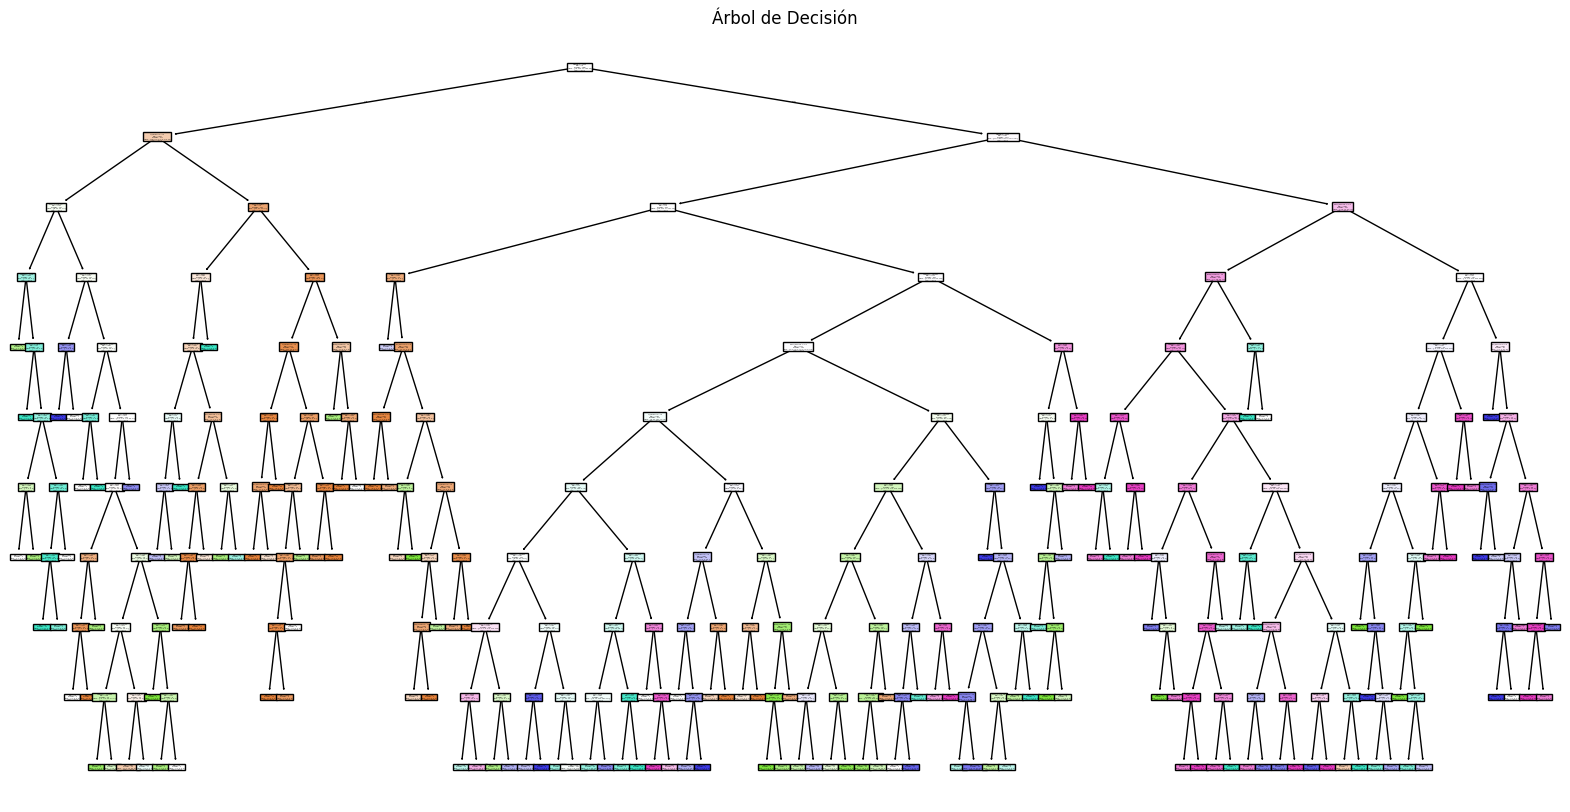

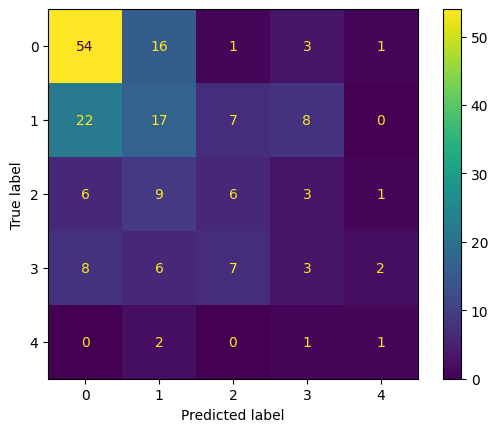

In [221]:
#3️⃣ Modelado y evaluación con Árbol de Decisión:

#Entrenar un modelo DecisionTreeClassifier utilizando las variables seleccionadas.

# se crea una vvariable con las características seleccionadas previamente.

caracteristicas_finales = ["oldpeak","thalch","slope_encoded","cp_encoded","ca","exang_encoded","trestbps","sex_encoded",]

# Se crea un marco de datos con dichas caracteristicas.

x_final = datos[caracteristicas_finales]

# Se importa el DecisiontreeClassifier.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Se dividen los datos entre entrenamiento y prueba.

x_train, x_test, y_train, y_test = train_test_split(x_final,y,test_size=0.2,random_state=42)

# Se inicial el modelo de decisión.

arbol = DecisionTreeClassifier(random_state=42)

# Se enctrena el modelo

arbol.fit(x_train,y_train)

# Finalmente se realizan las respectivas predicciones.

y_prediccion = arbol.predict(x_test)

# Se corrobora con accuracy score.

Accuracy = accuracy_score(y_test,y_prediccion)

print(f"precision del modelo {Accuracy}")


F1 = f1_score(y_test, y_prediccion, average="weighted")
print(f"F1-Score logística sin hiperparametros: {F1:.2f}")

recall = recall_score(y_test,y_prediccion,average="weighted")
print(f"recall sin hiperparametros:{recall}")

#Ajustar hiperparámetros tales como max_depth o min_samples_split para optimizar el modelo.

X_final = datos[caracteristicas_finales]

x_train, x_test, y_train, y_test = train_test_split(X_final,Y, test_size=0.2,random_state=42)


from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

MODELO = DecisionTreeClassifier(max_depth=10, min_samples_split=2,min_samples_leaf=4,random_state=42,class_weight="balanced")
MODELO.fit(x_train_bal, y_train_bal)


y_pred = MODELO.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"precisión con max_depth=5 y min_samples_split=10 {accuracy}")

#Evaluar el rendimiento usando las métricas: accuracy, precision, recall y f1-score.


from sklearn.metrics import precision_score, recall_score, classification_report

F1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1-Score logística: {F1:.2f}")

precision = precision_score(y_test,y_pred, average="weighted")
print(f"precisión:{precision}")

recall = recall_score(y_test,y_pred,average="weighted")
print(f"recall:{recall}")
#Opcionalmente visualizar el árbol generado (plot_tree).

parametros = {"max_depth":[3,5,10,None],
              "min_samples_split":[2,5,10,20]
              }

nuevo = DecisionTreeClassifier(random_state=42)

print("Clases presentes en entrenamiento:", np.unique(y_train))
print("Clases presentes en prueba:", np.unique(y_test))


from collections import Counter
print("Distribución en y_pred:", Counter(y_pred))


#🔁 Nivel avanzado (opcional):

#Implementar una búsqueda de hiperparámetros con GridSearchCV.

grid_search = GridSearchCV(estimator=nuevo,param_grid=parametros,cv=5, scoring="accuracy")
grid_search.fit(x_final,y)
print(f"mejores hiperparametros{grid_search.best_params_}")
print(f"mejores precisión: {grid_search.best_score_}")

train_accuracy = arbol.score(x_train, y_train)
test_accuracy = arbol.score(x_test, y_test)
print(f"Precisión en entrenamiento sin hiperparametros: {train_accuracy}")
print(f"Precisión en prueba sin hiperparametros: {test_accuracy}")


train_accuracy = MODELO.score(x_train, y_train)
test_accuracy = MODELO.score(x_test, y_test)
print(f"Precisión en entrenamiento con hiperparametros: {train_accuracy}")
print(f"Precisión en prueba  con hiperparametros: {test_accuracy}")

print("Clases en los datos:", MODELO.classes_)

plt.figure(figsize=(20, 10))  # Ajustar el tamaño de la figura
plot_tree(MODELO, feature_names=caracteristicas_finales, class_names=["Clase 0", "Clase 1", "Clase 2", "Clase 3", "Clase 4"], filled=True)
plt.title("Árbol de Decisión")
plt.show()


from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(arbol, x_test, y_test, display_labels=arbol.classes_)
plt.show()

4️⃣ Reflexión sobre Overfitting y Underfitting:

Comparar el rendimiento de modelos utilizando distintas cantidades de variables seleccionadas.

- Cuando se utiliza distinto tipos de variables se puede ver que el modelo puede desmejorar sus resultados y ser más imprecisos; si se toman de 7 variables el modelo no rinde igual, sin embargo, al acercarse a 7 características el modelo tiene mejores resultados. 

Analizar si ocurrió sobreajuste o subajuste en alguno de los modelos.

- Sin los hiperparametros se puede ver que el modelo se encuentra en overffiting el modelo se entrena demasiado bien, incluso relacionando datos que pueden ser considerados outliers, por lo que el modelo pierde eneralización.
- Con los hiperparametros se evita el sobreajuste del entrenamiento del modelo pero todavía no es lo suficiente preciso; por lo cual hay señales de underffiting pero no severo.


Reflexionar sobre cómo la selección de características impactó la precisión y generalización del modelo.

- Cuando se escogieron más características el modelo tuvo un rendimiento menor en el accuracy, f1 score, y matriz de confusión.